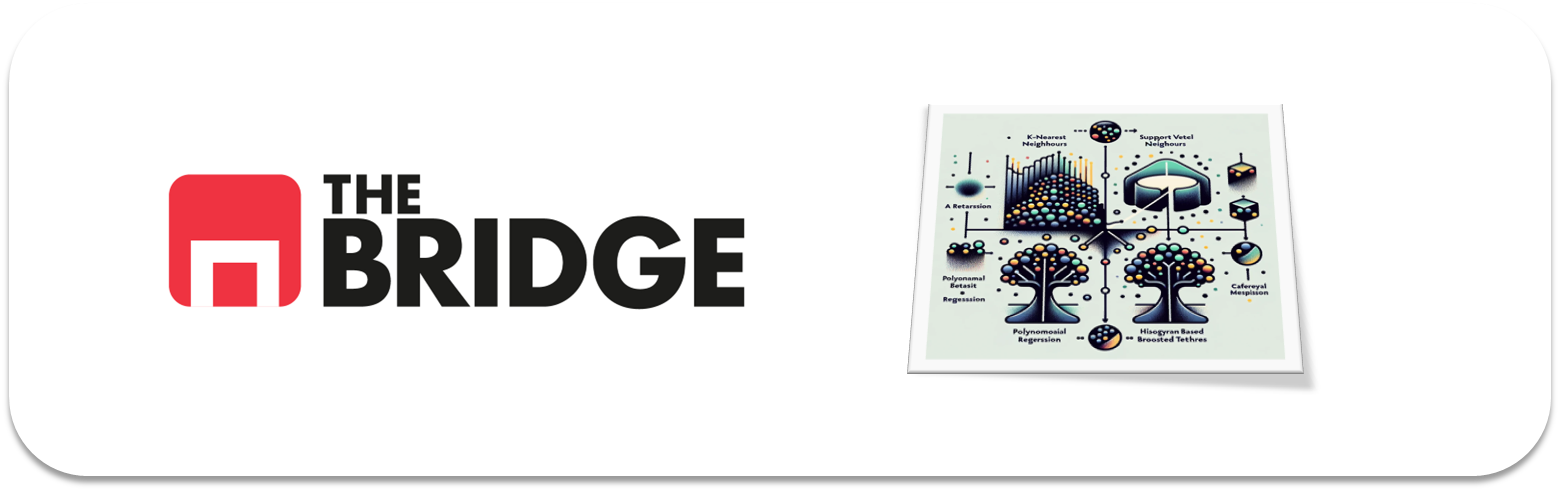

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
from toolbox_ML import describe_df

describe_df(df).T

,,,,
COL_N,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
SeriousDlqin2yrs,int64,0.0,2,0.02
RevolvingUtilizationOfUnsecuredLines,float64,0.0,10764,85.86
age,int64,0.0,78,0.62
NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,10,0.08
DebtRatio,float64,0.0,11547,92.1
MonthlyIncome,float64,0.06,4167,33.24
NumberOfOpenCreditLinesAndLoans,int64,0.0,43,0.34
NumberOfTimes90DaysLate,int64,0.0,13,0.1
NumberRealEstateLoansOrLines,int64,0.0,16,0.13


*Dataset completamente numérico, con algunos nulos en 'MonthlyIncome' y 'NumberOfDependents'*  
*El target corresponde a la primera variable `SeriousDlqin2yrs', única variable binaria*  
*A priori no consideraremos variables categóricas, ya que la de menor cardinalidad tiene 8 valores únicos* 

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

*Es un problema de clasificación binaria*  
*El target corresponde a la primera variable `SeriousDlqin2yrs', única variable binaria* 

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [5]:
target = 'SeriousDlqin2yrs'

df[target].value_counts(True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

*Variable completamente desbalanceada, a favor de los negativos (0), que en este caso, implican que no tendrán problemas económicos*

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [6]:
# Dividimos el dataset en train y test

set_train, set_test = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
# Sacamos lista de features (en este caso al ser todas numéricas, se englobarán en una sola lista)

features = set_train.columns.to_list()
features.remove(target)

In [8]:
# Vemos nulos (count), media y distribución de cada variable

set_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,10029.0,0.069897,0.254987,0.0,0.000000,0.000000,0.000000,1.000000
RevolvingUtilizationOfUnsecuredLines,10029.0,0.332534,0.368161,0.0,0.030773,0.164421,0.588571,5.347652
age,10029.0,52.006681,15.064668,21.0,41.000000,51.000000,62.000000,101.000000
NumberOfTime30-59DaysPastDueNotWorse,10029.0,0.400140,3.960430,0.0,0.000000,0.000000,0.000000,98.000000
DebtRatio,10029.0,1.859805,9.053464,0.0,0.142648,0.301520,0.506312,99.000000
MonthlyIncome,9458.0,6899.357158,12785.807976,0.0,3481.000000,5415.500000,8290.750000,702500.000000
NumberOfOpenCreditLinesAndLoans,10029.0,8.480905,5.150639,0.0,5.000000,8.000000,11.000000,49.000000
NumberOfTimes90DaysLate,10029.0,0.250972,3.940818,0.0,0.000000,0.000000,0.000000,98.000000
NumberRealEstateLoansOrLines,10029.0,0.997408,1.145652,0.0,0.000000,1.000000,2.000000,19.000000
NumberOfTime60-89DaysPastDueNotWorse,10029.0,0.221258,3.923659,0.0,0.000000,0.000000,0.000000,98.000000


In [9]:
# Imputamos los nulos como la mediana de cada variable

set_train.loc[set_train['MonthlyIncome'].isnull(), 'MonthlyIncome'] = set_train['MonthlyIncome'].median()
set_train.loc[set_train['NumberOfDependents'].isnull(), 'NumberOfDependents'] = set_train['NumberOfDependents'].median()

# Y aplicamos la mediana de las variables de train en test

set_test.loc[set_test['MonthlyIncome'].isnull(), 'MonthlyIncome'] = set_train['MonthlyIncome'].median()
set_test.loc[set_test['NumberOfDependents'].isnull(), 'NumberOfDependents'] = set_train['NumberOfDependents'].median()

In [10]:
# Comprobamos que no quedan nulos y los tipos de variables

set_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 5441 to 7270
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      10029 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  10029 non-null  float64
 2   age                                   10029 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  10029 non-null  int64  
 4   DebtRatio                             10029 non-null  float64
 5   MonthlyIncome                         10029 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       10029 non-null  int64  
 7   NumberOfTimes90DaysLate               10029 non-null  int64  
 8   NumberRealEstateLoansOrLines          10029 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  10029 non-null  int64  
 10  NumberOfDependents                    10029 non-null  float64
dtypes: float64(4), int

In [11]:
# Ahora que no hay nulos hacemos la separación a X, y

X_train = set_train.drop(target, axis=1)
y_train = set_train[target]

X_test = set_test.drop(target, axis=1)
y_test = set_test[target]

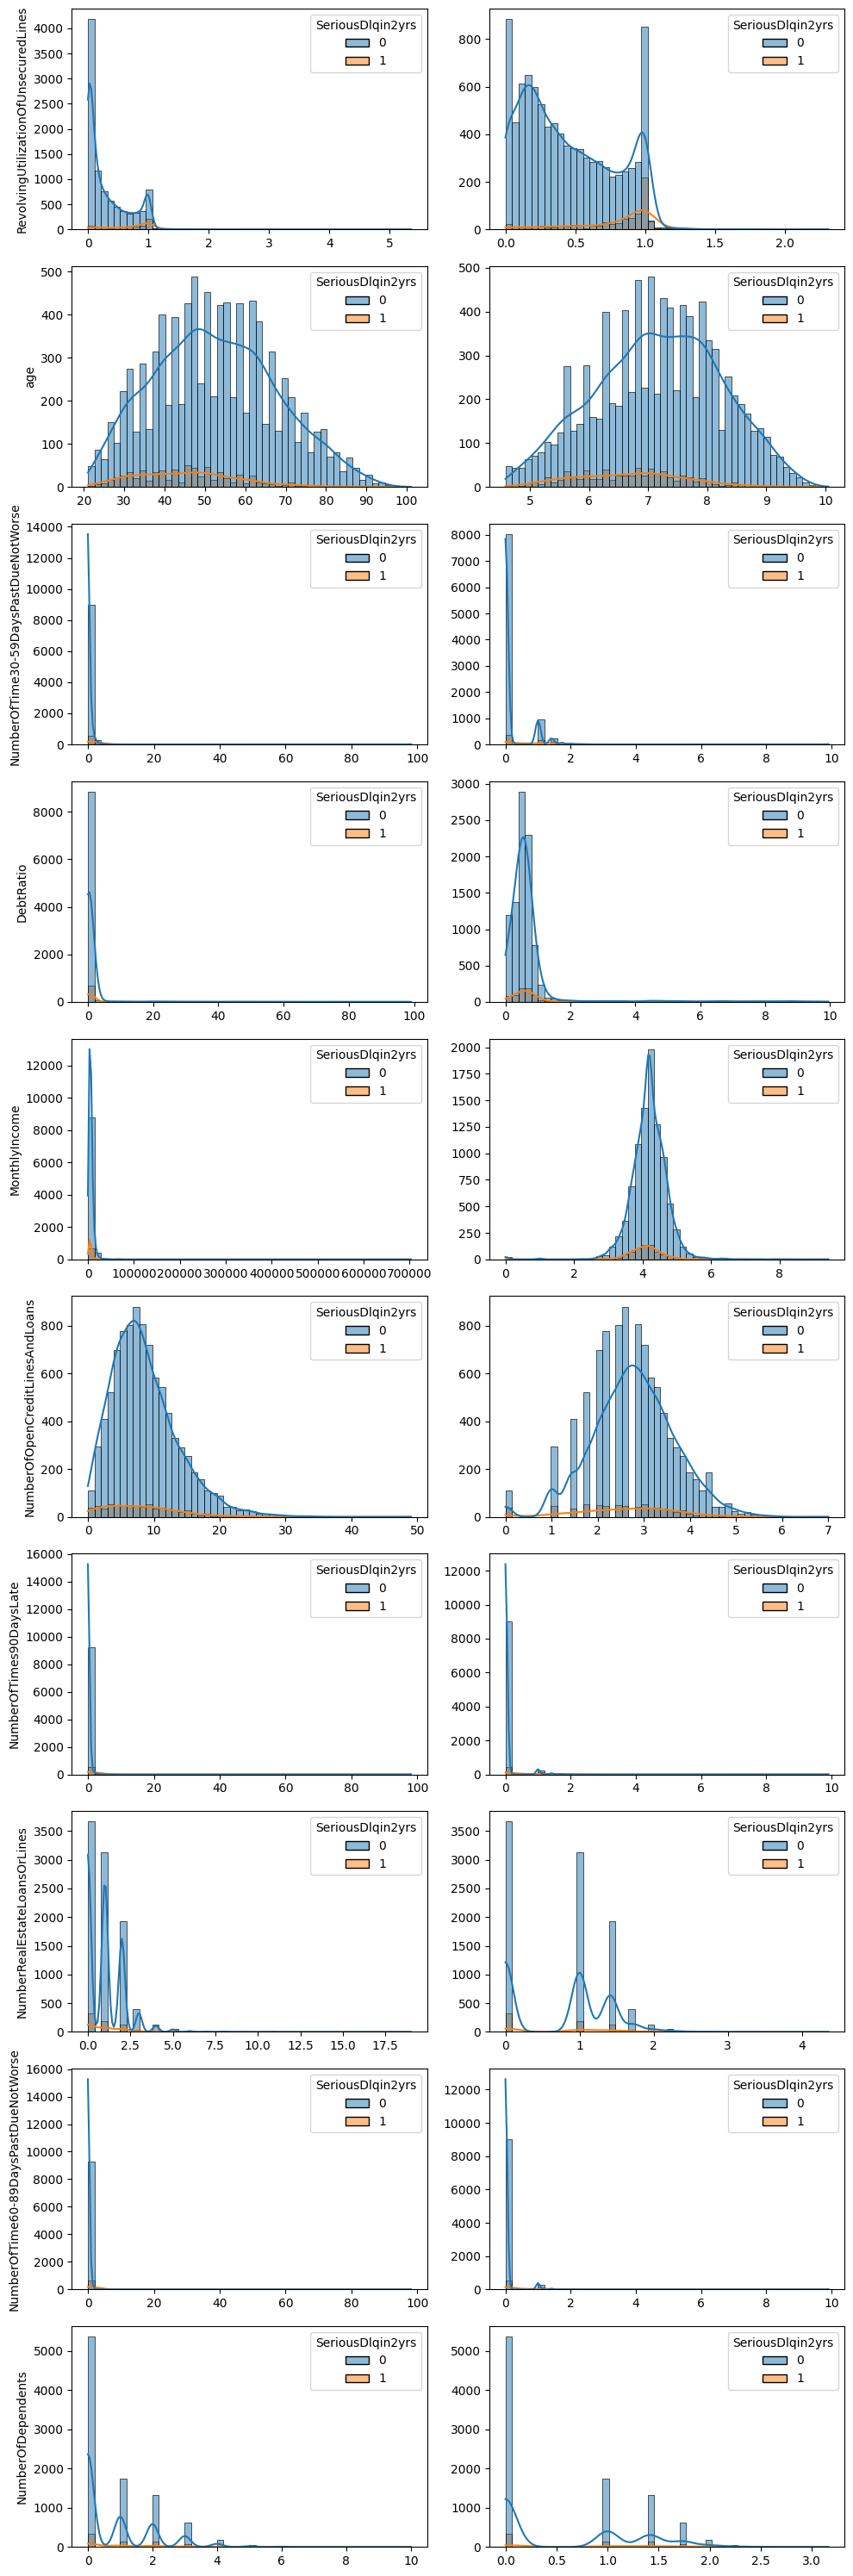

In [12]:
# Vemos la distribución de cada variable respecto a cada valor del target 
# y comparamos su distribución si aplicásemos una raíz cuadrada (una raíz cúbica antes de, en el caso de 'MonthlyIncome')

fig, ax = plt.subplots(len(features),2, figsize=(10,30))
for index, feature in enumerate(features):
    transform_feature = np.sqrt(set_train[feature]) if feature != 'MonthlyIncome' else np.sqrt(np.cbrt(set_train[feature]))
    sns.histplot(set_train, x=feature, hue=target, bins=50, kde=True, ax=ax[index, 0])
    sns.histplot(set_train, x=transform_feature, hue=target, bins=50, kde=True, ax=ax[index, 1])
    ax[index, 0].set_xlabel('')
    ax[index, 1].set_xlabel('')
    ax[index, 0].set_ylabel(feature)
    ax[index, 1].set_ylabel('')
plt.tight_layout()

In [13]:
# Con las transformaciones de la mayoría de variables logramos que el rango de las mismas quede entre 0 y 10 aproximadamente
# Ahora diferenciamos features sin y con transformaciones

features_maxmin = ['RevolvingUtilizationOfUnsecuredLines','NumberRealEstateLoansOrLines','NumberOfDependents']
features_transform = []

for feature in X_train.columns:
    if feature not in features_maxmin:
        features_transform.append(feature)
print(features_transform) 


['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']


In [14]:
# Primero copiamos los datasets y nos guardamos una copia sin transformar

X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

# Transformamos, comenzando con 'MonthlyIncome' a la cual aplicamos primero la raíz cúbica
# Y repetimos las transformaciones en X_test

X_train_scale['MonthlyIncome'] = np.cbrt(X_train_scale['MonthlyIncome'])
X_test_scale['MonthlyIncome'] = np.cbrt(X_test_scale['MonthlyIncome'])

for feature in features_transform:
    X_train_scale[feature] = np.sqrt(X_train_scale[feature])
    X_test_scale[feature] = np.sqrt(X_test_scale[feature])

# Y comprobamos

X_train_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,10029.0,0.332534,0.368161,0.000000,0.030773,0.164421,0.588571,5.347652
age,10029.0,7.133653,1.057256,4.582576,6.403124,7.141428,7.874008,10.049876
NumberOfTime30-59DaysPastDueNotWorse,10029.0,0.206926,0.597793,0.000000,0.000000,0.000000,0.000000,9.899495
DebtRatio,10029.0,0.740060,1.145533,0.000000,0.377688,0.549108,0.711556,9.949874
MonthlyIncome,10029.0,4.181444,0.540966,0.000000,3.905202,4.190570,4.472136,9.428466
NumberOfOpenCreditLinesAndLoans,10029.0,2.763445,0.918892,0.000000,2.236068,2.828427,3.316625,7.000000
NumberOfTimes90DaysLate,10029.0,0.083613,0.493969,0.000000,0.000000,0.000000,0.000000,9.899495
NumberRealEstateLoansOrLines,10029.0,0.997408,1.145652,0.000000,0.000000,1.000000,2.000000,19.000000
NumberOfTime60-89DaysPastDueNotWorse,10029.0,0.070638,0.465070,0.000000,0.000000,0.000000,0.000000,9.899495
NumberOfDependents,10029.0,0.807957,1.131119,0.000000,0.000000,0.000000,1.000000,10.000000


In [15]:
# Ahora escalaremos con un standardscaler para central la distribución

scaler = StandardScaler()
scaler.fit(X_train_scale)

X_train_scale = pd.DataFrame(scaler.transform(X_train_scale), columns=[features], index=X_train.index) 
X_test_scale = pd.DataFrame(scaler.transform(X_test_scale), columns=[features], index=X_test.index)

# Y comprobamos de nuevo

X_train_scale.describe().T

,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,10029.0,1.416976e-17,1.00005,-0.903276,-0.819686,-0.456653,0.695482,13.622760
age,10029.0,-3.576094e-16,1.00005,-2.413042,-0.691001,0.007355,0.700296,2.758430
NumberOfTime30-59DaysPastDueNotWorse,10029.0,8.005916e-17,1.00005,-0.346167,-0.346167,-0.346167,-0.346167,16.214722
DebtRatio,10029.0,2.550557e-17,1.00005,-0.646072,-0.316351,-0.166701,-0.024884,8.040163
MonthlyIncome,10029.0,-9.895808e-16,1.00005,-7.729978,-0.510672,0.016870,0.537384,9.699845
NumberOfOpenCreditLinesAndLoans,10029.0,-7.935067e-17,1.00005,-3.007516,-0.573955,0.070722,0.602038,4.610733
NumberOfTimes90DaysLate,10029.0,1.983767e-17,1.00005,-0.169277,-0.169277,-0.169277,-0.169277,19.872445
NumberRealEstateLoansOrLines,10029.0,-4.507756e-17,1.00005,-0.870646,-0.870646,0.002263,0.875172,15.714625
NumberOfTime60-89DaysPastDueNotWorse,10029.0,-3.825836e-17,1.00005,-0.151895,-0.151895,-0.151895,-0.151895,21.135197
NumberOfDependents,10029.0,-2.125464e-17,1.00005,-0.714334,-0.714334,-0.714334,0.169790,8.126909


In [16]:
# Ya tenemos nuestros dataset escalados (y en copia sin escalar)
# Ahora crearemos instancias a cada modelo y los compararemos
# En este caso, como vamos a compararlos, usaremos una semilla

rf_clf = RandomForestClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier() # por defecto n_neightboor = 5


print('RandomForest sin escalar:', np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='balanced_accuracy')))
print('RandomForest:', np.mean(cross_val_score(rf_clf, X_train_scale, y_train, cv=5, scoring='balanced_accuracy')))
print('Regresión Logística:', np.mean(cross_val_score(log_reg, X_train_scale, y_train, cv=5, scoring='balanced_accuracy')))
print('KNN:', np.mean(cross_val_score(knn, X_train_scale, y_train, cv=5, scoring='balanced_accuracy')))

RandomForest sin escalar: 0.5783144518910313
RandomForest: 0.5801893274586993
Regresión Logística: 0.550399486096161
KNN: 0.5788455823396456


*Curiosamente, RandomForest con los datos sin escalar ni transformar, consigue casi la misma valoración que KNN (0.0005 puntos menos)*  
*Ambos son superados por RandomForest con los datos escalados, y ya que los tenemos optimizados, vamos con éstos*

In [18]:
grid_rf_params = {
    'n_estimators':[100, 200],
    'max_depth':[5, 10, None],
    'min_samples_split':[2,3,5],
    'max_features':['sqrt',None],
    'class_weight':['balanced'] # fijaremos este parámetro al ser un dataset desbalanceado
}

rf_grid = GridSearchCV(rf_clf, param_grid=grid_rf_params, cv=5, scoring='balanced_accuracy')

rf_grid.fit(X_train_scale,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 10, None],
                         'max_features': ['sqrt', None],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 200]},
             scoring='balanced_accuracy')

In [20]:
rf_grid.best_score_

np.float64(0.7652039082313851)

In [21]:
rf_grid.best_params_

{'class_weight': 'balanced',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 200}

In [40]:
rf_best = rf_grid.best_estimator_
rf_best.feature_importances_

array([0.39443554, 0.06488489, 0.1585257 , 0.02260901, 0.02068379,
       0.02314564, 0.20525835, 0.01847845, 0.08699439, 0.00498425])

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      2345
           1       0.19      0.73      0.30       163

    accuracy                           0.78      2508
   macro avg       0.58      0.76      0.59      2508
weighted avg       0.93      0.78      0.83      2508



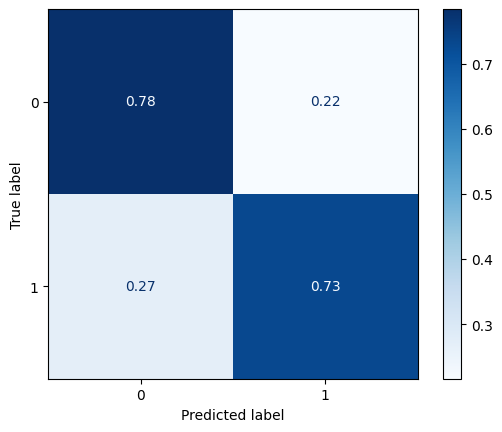

In [42]:
y_pred = rf_best.predict(X_test_scale)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues')

*Como puede comprobarse en la matriz de confusión, ha predicho un 73% de los casos que buscamos, es decir, de las personas que tendrán problemas financieros en los próximos 2 años. Además, muy cerca del 78% de los casos que no, dejando un buen balance de falsos positivos y negativos. Todo ello, teniendo en cuenta de que el datase de origen estaba muy desbalanceado, por lo que puedo afirmar de que tenemos un buen modelo*